# **Problem: Decision Tree Regressor Model**

The python program reads a csv file (average dataset) from the google drive, and creates a decision tree regression model on that dataset.  Visualize the tree, calculate RMSE and MAE. 

**Examples:**

Input  -->

> url = 'https://drive.google.com/file/d/1Hxksp6KSjoex0wdER032QypLUYmdLNeg/view?usp=sharing'

Output -->


> Decision tree
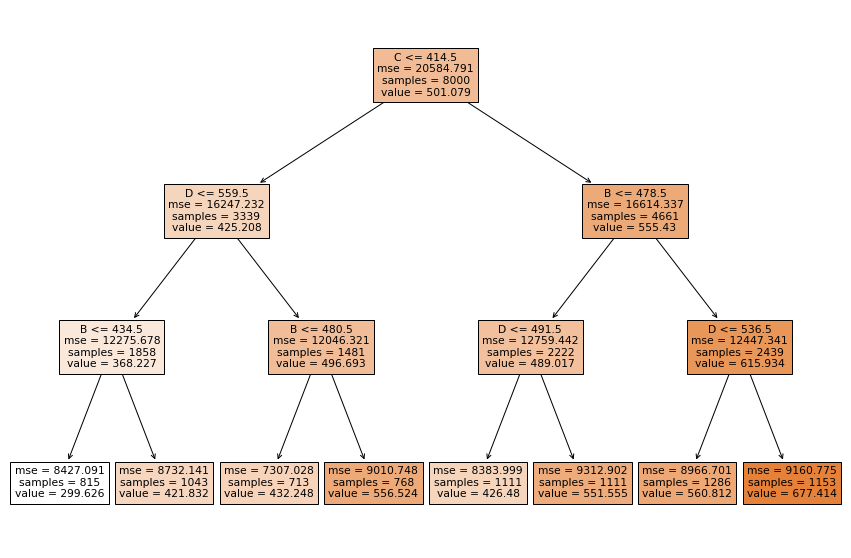



> RMSE = 10.929085509617472
 

> MAE = 8.549767857142857

**Notes:**

Following things are needed to be checked before running the program.
*   Check whether you have given the correct location of your csv file.
*   Check whether you file format is correct.
*   Check whether you have access to the file.

In [1]:
#@title MIT License

# Copyright (c) 2021 AIClub

# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated 
# documentation files (the "Software"), to deal in the Software without restriction, including without 
# limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of 
# the Software, and to permit persons to whom the Software is furnished to do so, subject to the following 
# conditions:

# The above copyright notice and this permission notice shall be included in all copies or substantial
# portions of the Software.

# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT 
# LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO 
# EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN 
# AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE 
# OR OTHER DEALINGS IN THE SOFTWARE.

# Import modules

In [2]:
# Import pandas module to read the CSV file and to process the tabular data
import pandas as pd

# Import train_test_split to split data as test and train
from sklearn.model_selection import train_test_split

# Import Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor 

# Import mean_absolute_error and mean_squared_error functions for error calculations
from sklearn.metrics import mean_absolute_error, mean_squared_error 

# Import sqrt function to get the square root of the mean_squared_error
from math import sqrt

# Import plot_tree function to visualize the decision tree
from sklearn.tree import plot_tree

# Import pyplot function to visualize the decision tree
from matplotlib import pyplot as plt

# Import gdown module to download files from google drive
import gdown

# Get the file location from the google drive

In [3]:
# Please change the url as needed (make sure you have the access to the file)
url = 'https://drive.google.com/file/d/1Hxksp6KSjoex0wdER032QypLUYmdLNeg/view?usp=sharing'

# Derive the file id from the url
file_id = url.split('/')[-2]

# Derive the download url of the file
download_url = 'https://drive.google.com/uc?id=' + file_id

# Give the file name you want to save it 
file_name = "average.csv" 

# Derive the file location
file_location = "/content/" + file_name

# Downloading, creating of decision tree regression model and calculating of metrics

Download and read the CSV file

In [ ]:
# Download the file from drive
gdown.download(download_url, file_location, quiet=False)

# Read the CSV file
data = pd.read_csv(file_location)

Display a sample from the dataset

In [ ]:
# Print a sample from the csv dataset
print('---------- First 5 rows of the Dataset ----------\n', data.head())

Create the decision tree regression model

In [ ]:
# Please change the target variable according to the dataset
# You can refer to the dataset details printed in the above step 
target_column = 'AVERAGE'

# Seperate the training data by removing the target column
X = data.drop(columns=[target_column])

# Separate the target values
y = data[target_column].values

# Split the dataset into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create decision tree regressor
# You can change the max_depth in order to reduce the error
regressor = DecisionTreeRegressor(max_depth=3)

# Train the model
regressor.fit(X_train, y_train)

# Predict using test values
y_pred = regressor.predict(X_test)

# Get actual values and predicted values into a table
predicted_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print('---------- Predicted Results ----------\n', predicted_results)

Visualize the tree

In [ ]:
# Get the feature names
feature_names = list(X.columns)

# Plot the decision tree
fig = plt.figure(figsize=(15,10))
plot_tree(regressor, feature_names=feature_names, filled=True)
plt.show()

MAE

In [ ]:
# Calculate the MAE
MAE = mean_absolute_error(y_test, y_pred)
print ('\nMean Absolute Error (MAE): ', MAE)

RMSE

In [ ]:
# Calculate the RMSE
RMSE = sqrt(mean_squared_error(y_test, y_pred))
print ('\nRoot Mean Squared Error (RMSE): ', RMSE)